# Hierarchical Clustering 

In [215]:
import pandas as pd
import seaborn as sns
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
import matplotlib.pylab as plt 
from sklearn.cluster import AgglomerativeClustering 
import sklearn

In [216]:
data= pd.read_csv('crime_data.csv')

In [217]:
data1=data.drop(['Unnamed: 0'],axis=1)
data1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [218]:
data1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


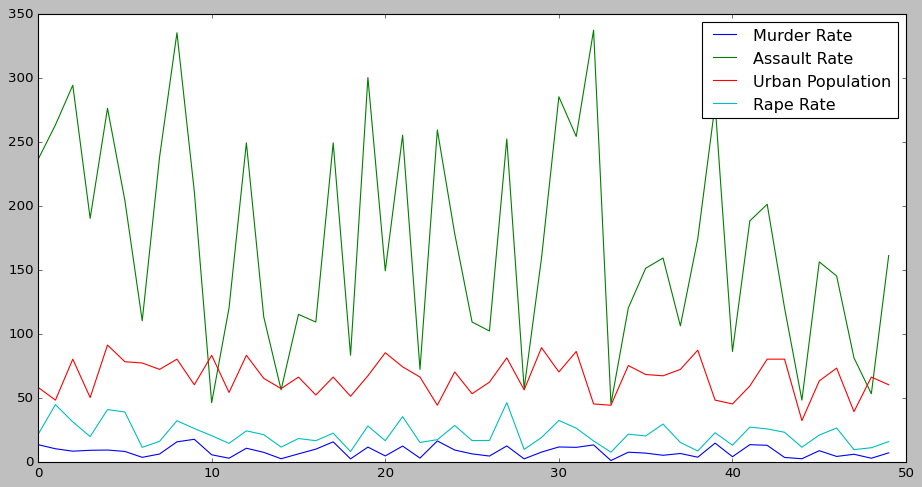

In [219]:
plt.figure(figsize=[14,7])
plt.plot(data1)
plt.legend(['Murder Rate','Assault Rate','Urban Population','Rape Rate'])

In [220]:
data1.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


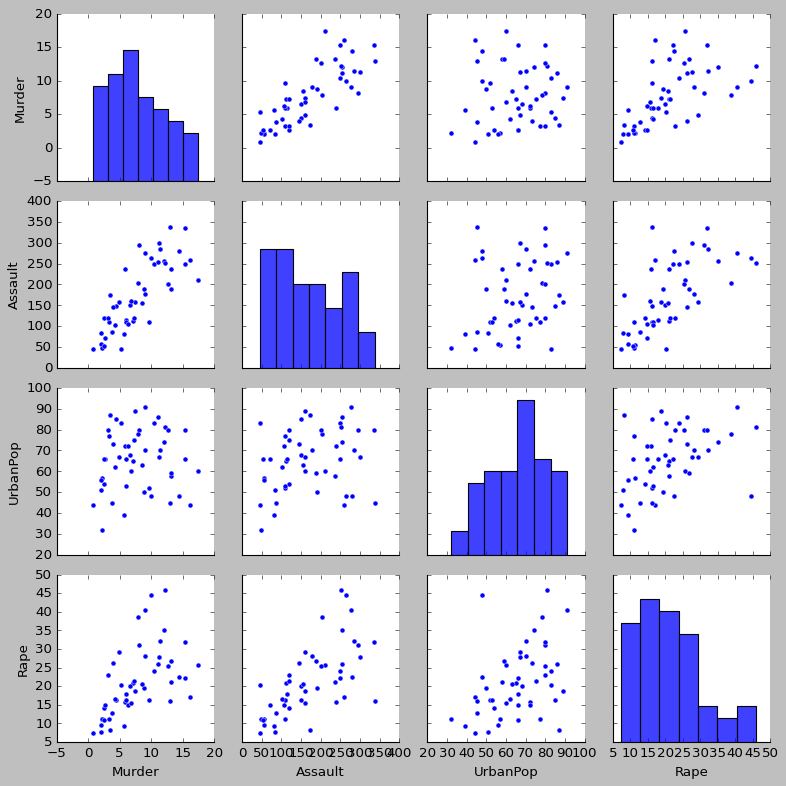

In [221]:
sns.pairplot(data1)

## Normalising Data

In [222]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)  

In [223]:
df_norm = norm_func(data1.iloc[:,1:])
df_norm

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465
5,0.544521,0.779661,0.811370
6,0.222603,0.762712,0.098191
7,0.660959,0.677966,0.219638
8,0.993151,0.813559,0.635659
9,0.568493,0.474576,0.478036


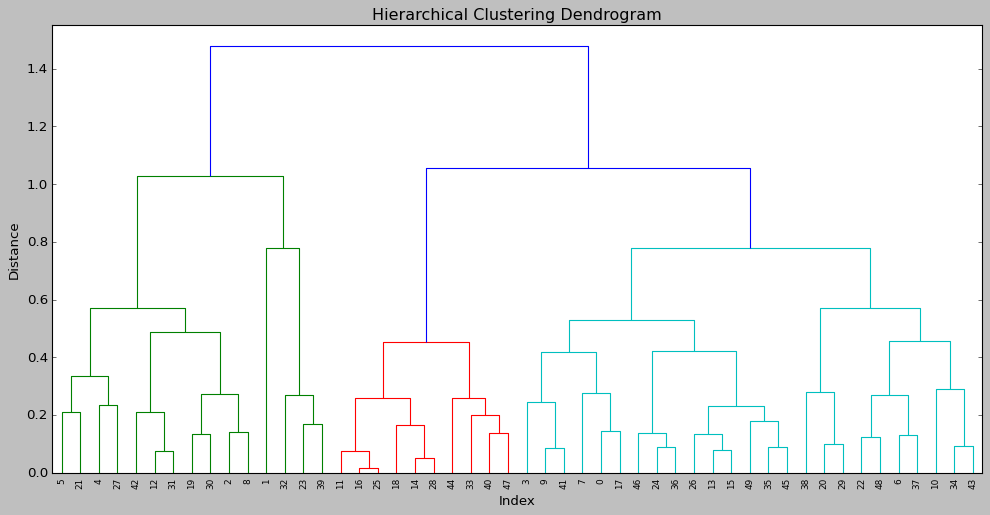

In [224]:
z = linkage(df_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 7))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z)
plt.show()     

In [225]:
h_complete = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = "euclidean").fit(df_norm) 
cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
data['clust']=cluster_labels
data=data.rename({'Unnamed: 0':'State'},axis=1)
data

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,State,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,4
5,Colorado,7.9,204,78,38.7,4
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,1


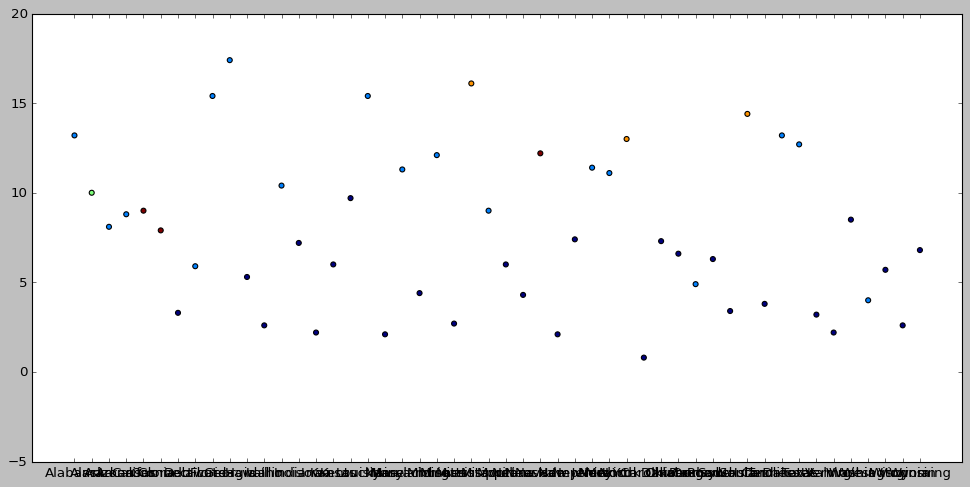

In [226]:
plt.figure(figsize=[15,7])
plt.scatter(data['State'],data['Murder'],c=data['clust'])

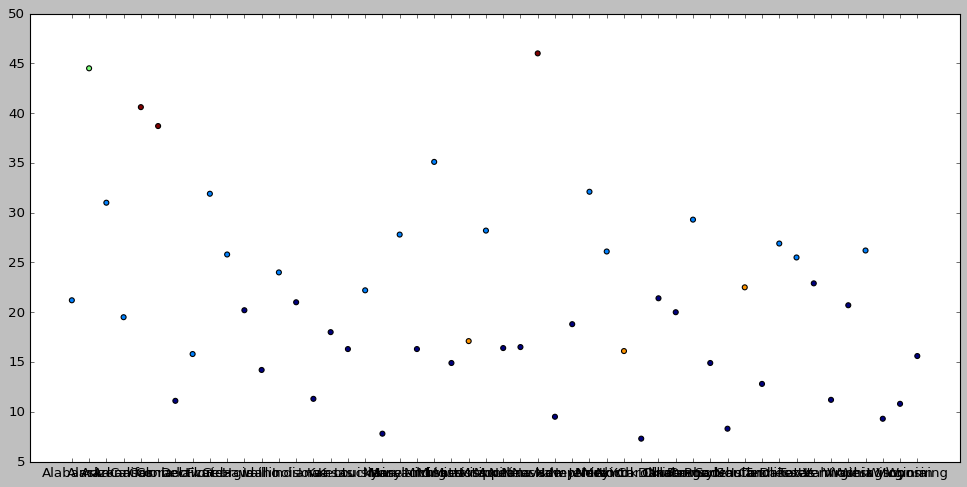

In [227]:
plt.figure(figsize=[15,7])
plt.scatter(data['State'],data['Rape'],c=data['clust'])

# Kmeans

In [228]:
from sklearn.cluster import KMeans


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

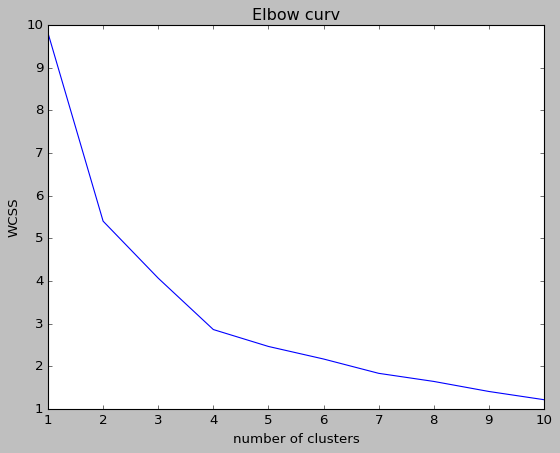

In [229]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [230]:
print(wcss)

[9.81079986191271, 5.4022284074736735, 4.066272321428981, 2.8621772882774135, 2.465789353790142, 2.1716847724042543, 1.836100785248778, 1.6460951471896568, 1.410723315361127, 1.2181036278402324]


In [231]:
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 2, 0, 0, 3, 2, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [232]:
data2=data.copy()

In [233]:
x=pd.Series(model.labels_)
data2['Clust']=x
data2

,State,Murder,Assault,UrbanPop,Rape,clust,Clust
0,Alabama,13.2,236,58,21.2,1,2
1,Alaska,10.0,263,48,44.5,2,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,4,0
5,Colorado,7.9,204,78,38.7,4,0
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,1,2
8,Florida,15.4,335,80,31.9,1,0
9,Georgia,17.4,211,60,25.8,1,2


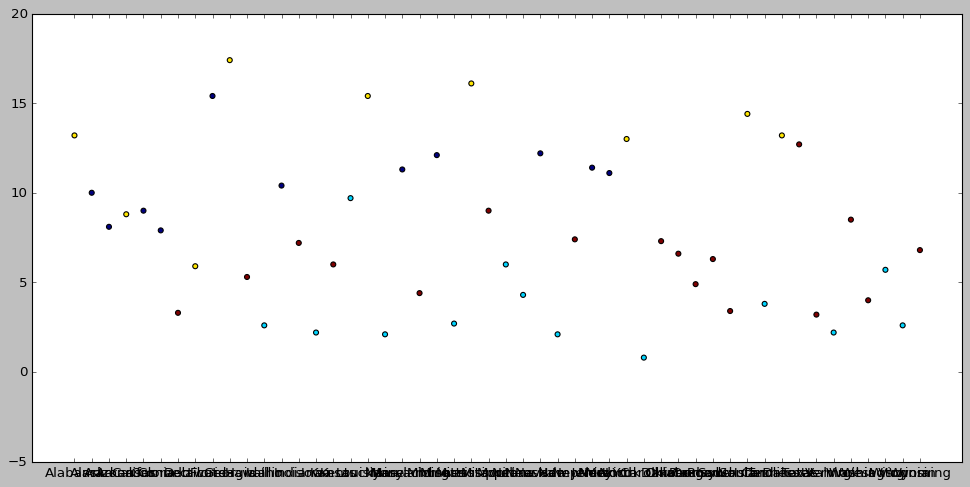

In [234]:
plt.figure(figsize=[15,7])
plt.scatter(data2['State'],data2['Murder'],c=data2['Clust'])

# DBSCAN

In [235]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [236]:
data3=data.copy()


In [237]:
data4= data3.drop(['State','clust'],axis=1)
df=data4.values
df

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [238]:
stscaler=StandardScaler().fit(df)
x=stscaler.transform(df)

In [239]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [240]:
dbscan=DBSCAN(eps=2,min_samples=6)
dbscan.fit(x)

DBSCAN(eps=2, min_samples=6)

In [241]:
d1=dbscan.labels_

In [242]:
#Calculating silhouette score 

In [243]:
sklearn.metrics.silhouette_score(x, d1) 

0.23455598753159795

In [244]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(x)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [245]:
a=pd.DataFrame(y_kmeans)
data4['Cluster_Value']=a
data4['State']=data2['State']

In [246]:
#Calculating silhouette score 

In [247]:
sklearn.metrics.silhouette_score(x,y_kmeans) 

0.33968891433344395

In [248]:
>>> plt.style.use('classic')   

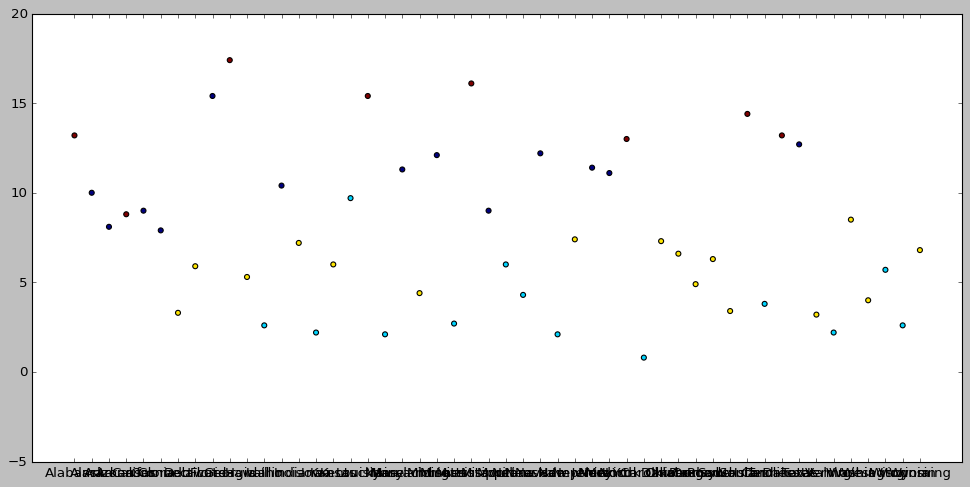

In [249]:
plt.figure(figsize=[15,7])
plt.scatter(data4['State'],data4['Murder'],c=data4['Cluster_Value'])

Text(0.5, 1.0, 'Clusters using DBSCAN')

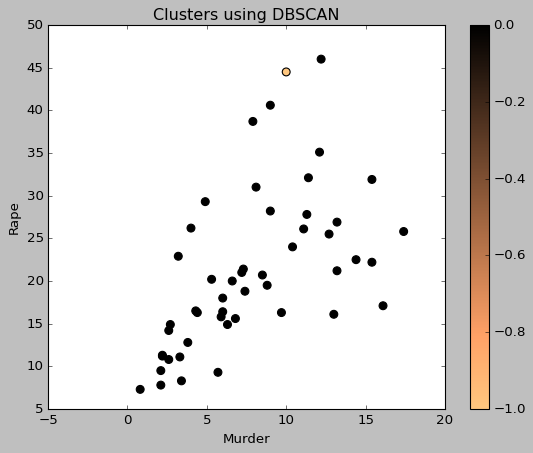

In [250]:
data4.plot(x="Murder",y ="Rape",c=d1 ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBSCAN')   

Text(0.5, 1.0, 'Clusters using KMeans')

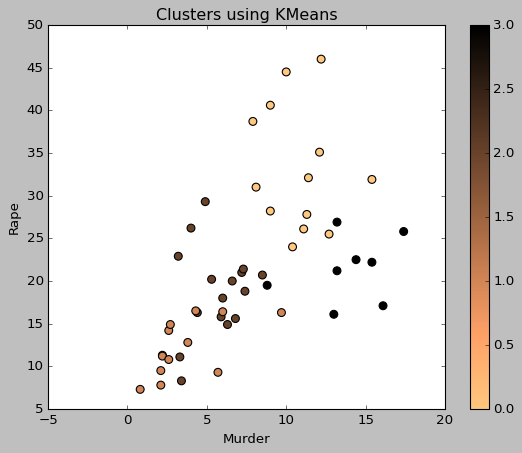

In [251]:
data4.plot(x="Murder",y ="Rape",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')

## We have used 3 methods 


1.   Agglomerative Clustering
2.   K Means
3. DBSCAN

---


### Comparing the cluster value of each with other variables

In [252]:
data.groupby(['clust']).count()

,State,Murder,Assault,UrbanPop,Rape
clust,,,,,
0,26,26,26,26,26
1,17,17,17,17,17
2,1,1,1,1,1
3,3,3,3,3,3
4,3,3,3,3,3


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clust', ylabel='count'>

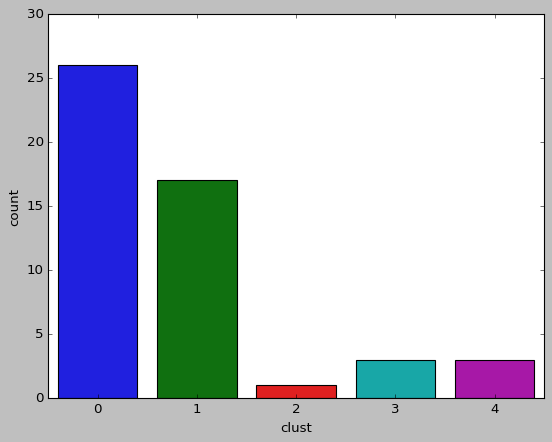

In [253]:
sns.countplot(data['clust'])

#### As Maximum values are present in cluster 0 and 1, analyzing them

In [254]:
ana_clust_1=pd.DataFrame(data.loc[data.clust==0].mean(),columns=['Values_hclustering'])
ana_clust_1

<ipython-input-254-af95c1a758d9>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ana_clust_1=pd.DataFrame(data.loc[data.clust==0].mean(),columns=['Values_hclustering'])


,Values_hclustering
Murder,4.711538
Assault,103.884615
UrbanPop,63.346154
Rape,14.903846
clust,0.000000


In [255]:
ana_clust_2=pd.DataFrame(data.loc[data.clust==1].mean(),columns=['Values_hclustering'])
ana_clust_2

<ipython-input-255-607f5166448b>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ana_clust_2=pd.DataFrame(data.loc[data.clust==1].mean(),columns=['Values_hclustering'])


,Values_hclustering
Murder,10.841176
Assault,233.352941
UrbanPop,70.294118
Rape,26.388235
clust,1.000000


In [256]:
data2.groupby(['Clust']).count()

,State,Murder,Assault,UrbanPop,Rape,clust
Clust,,,,,,
0,11,11,11,11,11,11
1,13,13,13,13,13,13
2,9,9,9,9,9,9
3,17,17,17,17,17,17


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clust', ylabel='count'>

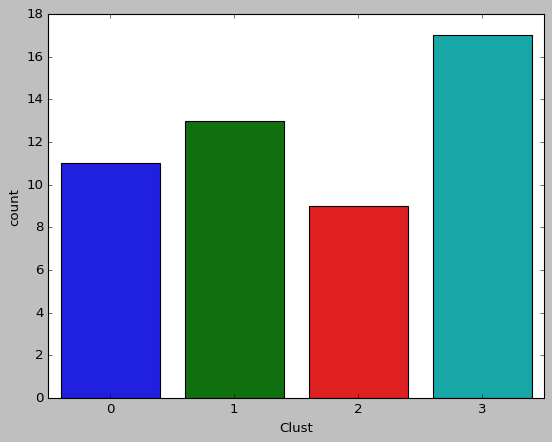

In [257]:
sns.countplot(data2['Clust'])

In [258]:
ana_clust_3=pd.DataFrame(data2.loc[data2.Clust==0].mean(),columns=['Values_kmeans'])
ana_clust_3

<ipython-input-258-a7f07c849623>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ana_clust_3=pd.DataFrame(data2.loc[data2.Clust==0].mean(),columns=['Values_kmeans'])


,Values_kmeans
Murder,10.809091
Assault,269.727273
UrbanPop,76.181818
Rape,34.345455
clust,1.909091
Clust,0.000000


In [259]:
data4.groupby(['Cluster_Value']).count()

,Murder,Assault,UrbanPop,Rape,State
Cluster_Value,,,,,
0,13,13,13,13,13
1,13,13,13,13,13
2,16,16,16,16,16
3,8,8,8,8,8


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cluster_Value', ylabel='count'>

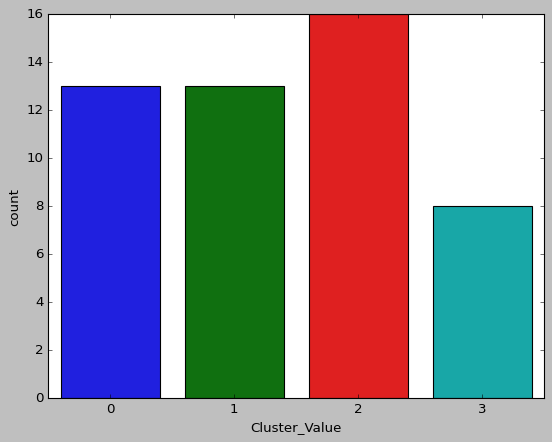

In [260]:
sns.countplot(data4['Cluster_Value'])

In [261]:
ana_clust_4=pd.DataFrame(data4.loc[data4.Cluster_Value==3].mean(),columns=['Values_dbscan'])
ana_clust_4

<ipython-input-261-42da1f19d1db>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ana_clust_4=pd.DataFrame(data4.loc[data4.Cluster_Value==3].mean(),columns=['Values_dbscan'])


,Values_dbscan
Murder,13.9375
Assault,243.6250
UrbanPop,53.7500
Rape,21.4125
Cluster_Value,3.0000


In [262]:
con=pd.concat([ana_clust_1,ana_clust_3,ana_clust_4],axis=1)
con

,Values_hclustering,Values_kmeans,Values_dbscan
Murder,4.711538,10.809091,13.9375
Assault,103.884615,269.727273,243.6250
UrbanPop,63.346154,76.181818,53.7500
Rape,14.903846,34.345455,21.4125
clust,0.000000,1.909091,NaN
Clust,NaN,0.000000,NaN
Cluster_Value,NaN,NaN,3.0000


In [263]:
data.describe()

,Murder,Assault,UrbanPop,Rape,clust
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000,0.800000
std,4.35551,83.337661,14.474763,9.366385,1.142857
min,0.80000,45.000000,32.000000,7.300000,0.000000
25%,4.07500,109.000000,54.500000,15.075000,0.000000
50%,7.25000,159.000000,66.000000,20.100000,0.000000
75%,11.25000,249.000000,77.750000,26.175000,1.000000
max,17.40000,337.000000,91.000000,46.000000,4.000000


In [264]:
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    for x in unique_list:
        print(x)

In [265]:
st_l_1= data.query('clust==0').State.tolist()
st_l_2=data2.query('Clust==0').State.tolist()
st_l_3=data4.query('Cluster_Value==0').State.tolist()
st_l=st_l_1+st_l_2+st_l_3

In [266]:
st_1= data.query('clust==3').State.tolist()
st_2=data2.query('Clust==2').State.tolist()
st_3=data4.query('Cluster_Value==1').State.tolist()
st_h=st_1+st_2+st_3


## States with lower to mean range of crime rates are

In [267]:
unique(st_l)

Connecticut
Hawaii
Idaho
Indiana
Iowa
Kansas
Kentucky
Maine
Massachusetts
Minnesota
Montana
Nebraska
New Hampshire
New Jersey
North Dakota
Ohio
Oklahoma
Pennsylvania
Rhode Island
South Dakota
Utah
Vermont
Virginia
West Virginia
Wisconsin
Wyoming
Alaska
Arizona
California
Colorado
Florida
Illinois
Maryland
Michigan
Nevada
New Mexico
New York
Missouri
Texas


## States with higher range of crime rates are


In [268]:
unique(st_h)

Mississippi
North Carolina
South Carolina
Alabama
Arkansas
Delaware
Georgia
Louisiana
Tennessee
Idaho
Iowa
Kentucky
Maine
Minnesota
Montana
Nebraska
New Hampshire
North Dakota
South Dakota
Vermont
West Virginia
Wisconsin
